In [63]:
## 学校数等の推移（中学校）: Junior High School data in prefecture Ibaraki
### https://www.pref.ibaraki.jp/kikaku/joho/it/opendata/od-05/010700_20190204_30gakkou.html
### 使用ファイル　：010700_20210226_nenji1-chu.csv

import pandas as pd

df = pd.read_csv('data/010700_20210226_nenji1-chu.csv',thousands=',', encoding="shift-jis")
df

,区分（中学校(公立・私立)）,学校数_本校[校],学校数_分校[校],学校数_中高一貫教育校(再掲)_併設型[校],学校数_中高一貫教育校(再掲)_連携型[校],学級数[学級],生徒数_計[人],生徒数_男[人],生徒数_女[人],教員数(本務者)_計[人],教員数(本務者)_男[人],教員数(本務者)_女[人],職員数(本務者)_計[人],職員数(本務者)_男[人],職員数(本務者)_女[人]
0,昭和33年度,331,5,…,…,2778,125863,63821,62042,4103,3297,806,579,194,385
1,昭和34年度,315,5,…,…,2860,124669,63441,61228,4439,3542,897,580,189,391
2,昭和35年度,301,3,…,…,3132,139962,70990,68972,4840,3860,980,582,187,395
3,昭和36年度,292,3,…,…,3474,159600,80853,78747,5260,4158,1102,602,198,404
4,昭和37年度,281,1,…,…,3655,166354,84505,81849,5532,4324,1208,611,202,409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,平成28年度,233,-,10,3,2951,80334,41046,39288,6119,3490,2629,409,116,293
59,平成29年度,230,-,10,3,2953,78426,40143,38283,6080,3475,2605,390,118,272
60,平成30年度,224,-,10,3,2901,74869,38348,36521,5876,3327,2549,377,119,258
61,令和元年度,223,-,10,2,2886,73523,37683,35840,5858,3302,2556,361,113,248


In [64]:
import numpy as np

# 和暦の年度を西暦へ変換 :convert Japanese calendar year to Gregorian calendar
df['year'] = np.arange(1958, 1958+63)
df1 = df.copy()
df1['生徒百人あたり教員数[人]'] = (df['教員数(本務者)_計[人]'] / df['生徒数_計[人]'] * 100)
df1['生徒数 [千人]'] = (df['生徒数_計[人]'] / 1000)
# dataframe for graphs
tyuugaku = df1[['year', '学校数_本校[校]', '生徒数 [千人]','教員数(本務者)_計[人]', '生徒百人あたり教員数[人]']]
tyuugaku

,year,学校数_本校[校],生徒数 [千人],教員数(本務者)_計[人],生徒百人あたり教員数[人]
0,1958,331,125.863,4103,3.259894
1,1959,315,124.669,4439,3.560629
2,1960,301,139.962,4840,3.458081
3,1961,292,159.600,5260,3.295739
4,1962,281,166.354,5532,3.325439
...,...,...,...,...,...
58,2016,233,80.334,6119,7.616949
59,2017,230,78.426,6080,7.752531
60,2018,224,74.869,5876,7.848375
61,2019,223,73.523,5858,7.967575


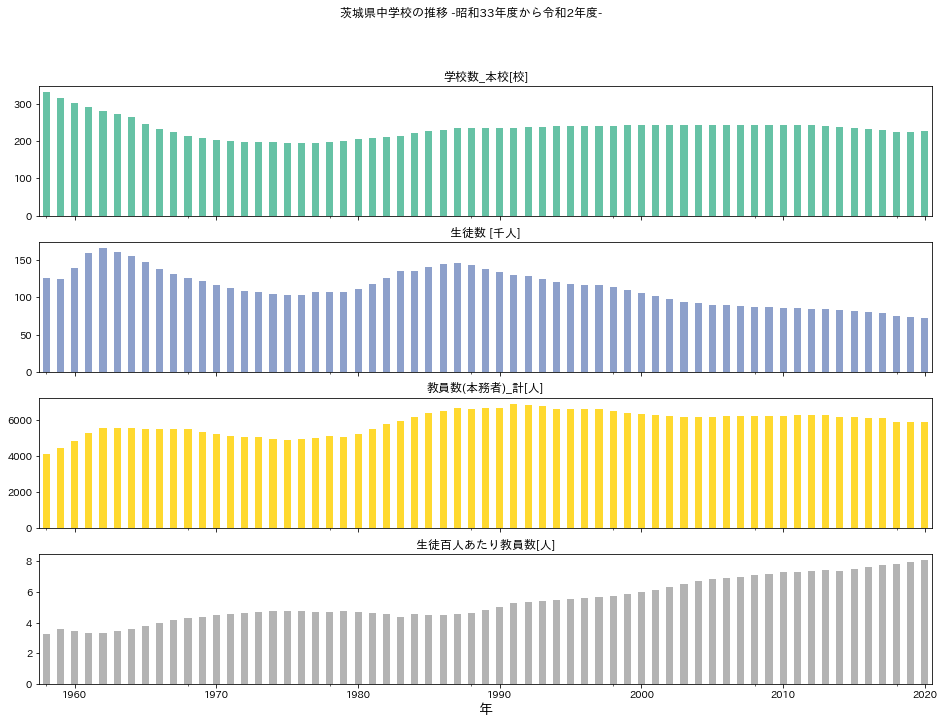

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
xlabels = np.arange(1960, 1958+63, 10)
cmap='Set2'
tyuugaku.plot(figsize=(16,11), sharex=True,  subplots=True, kind='bar', x = 'year', 
              cmap=cmap, title="茨城県中学校の推移 -昭和33年度から令和2年度-",legend=False)
plt.xlabel('年', fontsize=14)
plt.xticks([2,12,22,32,42,52,62], xlabels, rotation='0')
plt.savefig("graph/茨城中学校数の推移" + cmap +".png")
plt.show()

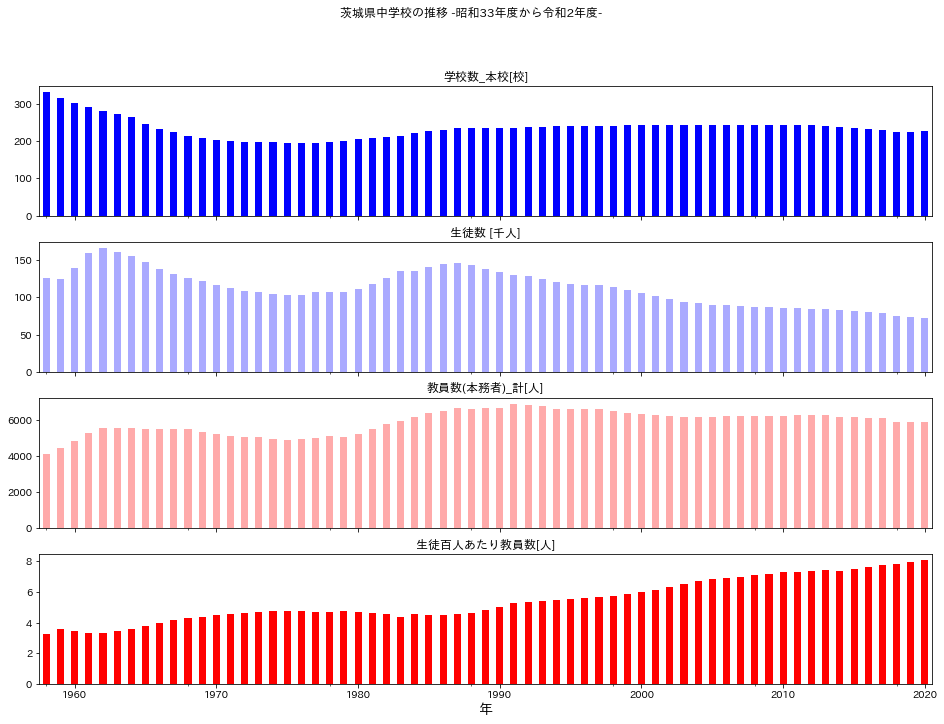

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
xlabels = np.arange(1960, 1958+63, 10)
cmap='bwr'
tyuugaku.plot(figsize=(16,11), sharex=True,  subplots=True, kind='bar', x = 'year', 
              cmap=cmap, title="茨城県中学校の推移 -昭和33年度から令和2年度-",legend=False)
plt.xlabel('年', fontsize=14)
plt.xticks([2,12,22,32,42,52,62], xlabels, rotation='0')
plt.savefig("graph/茨城中学校数の推移" + cmap +".png")
plt.show()

In [67]:
tyuugaku.describe() #茨城県中学校の統計データ

,year,学校数_本校[校],生徒数 [千人],教員数(本務者)_計[人],生徒百人あたり教員数[人]
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1989.000000,234.539683,113.436317,5871.746032,5.434324
std,18.330303,27.548096,24.051842,649.727535,1.394498
min,1958.000000,195.000000,72.436000,4103.000000,3.259894
25%,1973.500000,217.500000,91.025500,5404.000000,4.525353
50%,1989.000000,236.000000,112.443000,6133.000000,4.809438
75%,2004.500000,242.000000,131.376500,6299.500000,6.776030
max,2020.000000,331.000000,166.354000,6882.000000,8.092661


# from these graphs and data 
- 生徒数 : 2 peaks: 1st.団塊の世代 , 2nd.団塊ジュニア世代 
- 生徒数は1980年代後半から緩やかに減少している。
- 学校数：団塊ジュニア世代以降はあまり減らしていない
- 教員数：ピークは1991年頃
- 生徒一人あたりの教員数はこの60年間で2倍以上に増加している。

- Number of Students: 2 peaks: 1st. Dankai generation, 2nd. Dankai junior generation
- From the late 1980's, students decrease gradually.
- Number of Schools : after 2nd peak, number of schools has not changed much.
- Number of Teachers : maximum peak around 1991.
- Number of Teachers per student increases over twice these 60 years.

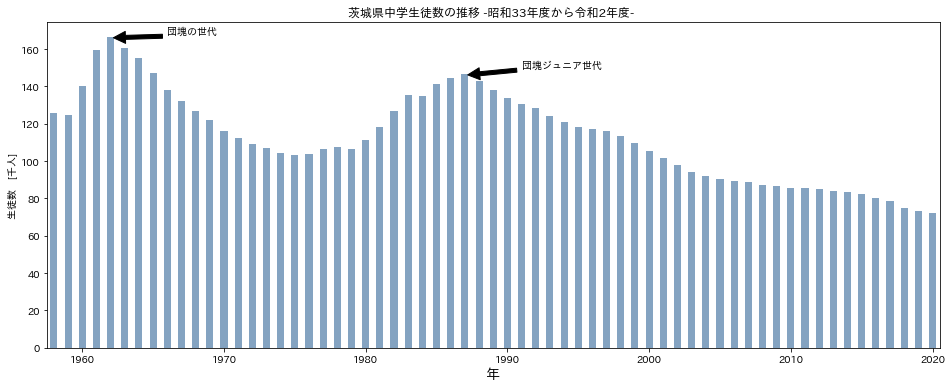

In [68]:
import matplotlib.patches as mpatches
students = tyuugaku[['year', '生徒数 [千人]']]

#plot
xlabels = np.arange(1960, 1958+63, 10)
students.plot(figsize=(16,6),  kind='bar', x = 'year', color=(0.2, 0.4, 0.6, 0.6),
              title="茨城県中学生徒数の推移 -昭和33年度から令和2年度- ", legend=False)
plt.xlabel('年', fontsize=14)
plt.xticks([2,12,22,32,42,52,62], xlabels, rotation='0')
plt.ylabel('生徒数　[千人]')
plt.annotate("団塊の世代", xytext=(8,168), xy=(4,166), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("団塊ジュニア世代", xytext=(33,150), xy=(29,146), arrowprops=dict(facecolor='black', shrink=0.05))

plt.savefig("graph/茨城中学生徒数の推移_団塊.png")
plt.show()

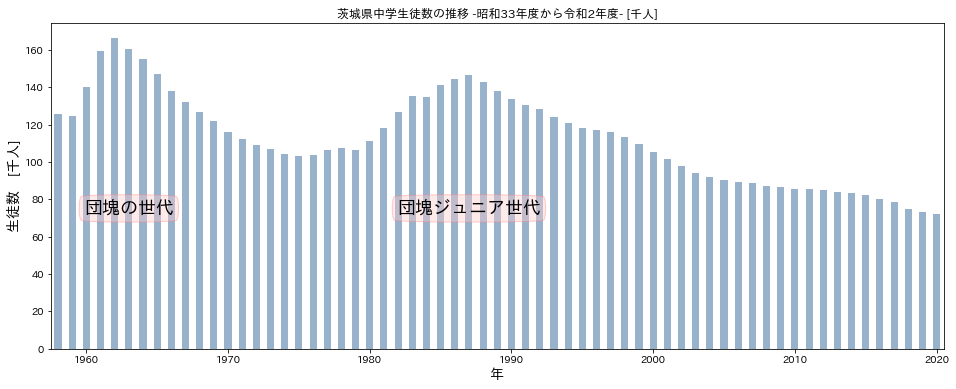

In [69]:
import matplotlib.patches as mpatches
students = tyuugaku[['year', '生徒数 [千人]']]

#plot
xlabels = np.arange(1960, 1958+63, 10)
students.plot(figsize=(16,6),  kind='bar', x = 'year', color=(0.2, 0.4, 0.6, 0.5),
              title="茨城県中学生徒数の推移 -昭和33年度から令和2年度- [千人]", legend=False)
plt.xlabel('年', fontsize=14)
plt.xticks([2,12,22,32,42,52,62], xlabels, rotation='0')
plt.ylabel('生徒数　[千人]', fontsize=14)
plt.text(5,80, "団塊の世代", size=18,ha="center", va="top",
         bbox=dict(boxstyle="round4",ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),alpha=0.4))
plt.text(29,80, "団塊ジュニア世代", size=18,ha="center", va="top",
             bbox=dict(boxstyle="round4",ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),alpha=0.4))

plt.savefig("graph/茨城中学生徒数の推移round4.png")
plt.show()

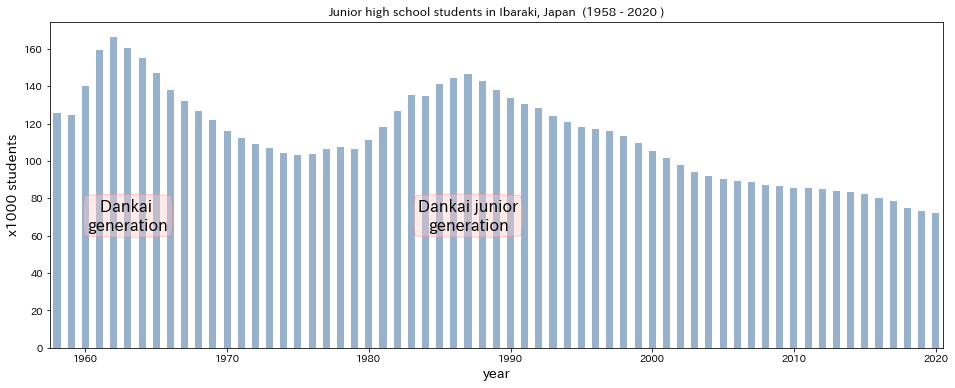

In [70]:
import matplotlib.patches as mpatches
students = tyuugaku[['year', '生徒数 [千人]']]

#plot
xlabels = np.arange(1960, 1958+63, 10)
students.plot(figsize=(16,6),  kind='bar', x = 'year', color=(0.2, 0.4, 0.6, 0.5),
              title="Junior high school students in Ibaraki, Japan  (1958 - 2020 )", legend=False)
plt.xlabel('year', fontsize=14)
plt.xticks([2,12,22,32,42,52,62], xlabels, rotation='0')
plt.ylabel('x1000 students', fontsize=14)

#text in round4
plt.text(5,80, "Dankai \ngeneration", size=16, ha="center", va="top",
         bbox=dict(boxstyle="round4", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),alpha=0.4))
plt.text(29,80, "Dankai junior\ngeneration", size=16,ha="center", va="top",
             bbox=dict(boxstyle="round4",ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),alpha=0.4))
# Dankai generation means baby boomers in Japan soon after the World War II.
plt.savefig("graph/ibaraki_jhStudents_round4.png")
plt.show()

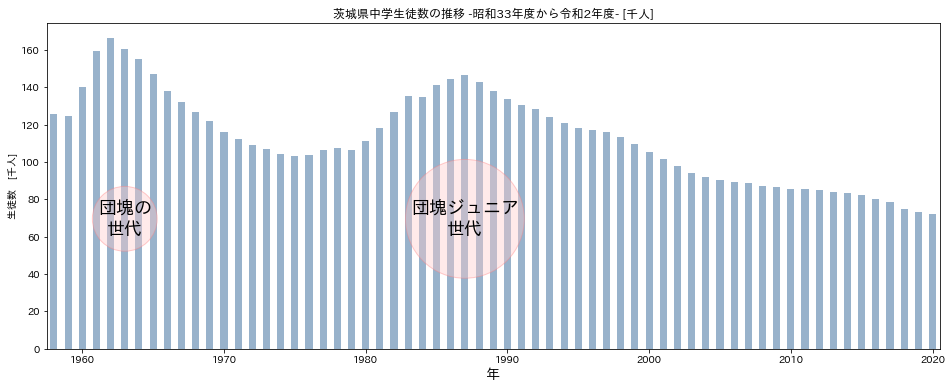

In [71]:
import matplotlib.patches as mpatches
students = tyuugaku[['year', '生徒数 [千人]']]

#plot
xlabels = np.arange(1960, 1958+63, 10)
students.plot(figsize=(16,6),  kind='bar', x = 'year', color=(0.2, 0.4, 0.6, 0.5),
              title="茨城県中学生徒数の推移 -昭和33年度から令和2年度- [千人]", legend=False)
plt.xlabel('年', fontsize=14)
plt.xticks([2,12,22,32,42,52,62], xlabels, rotation='0')
plt.ylabel('生徒数　[千人]')
#text in circle
plt.text(5,80, "団塊の\n世代", size=18,ha="center", va="top",
         bbox=dict(boxstyle="circle",ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),alpha=0.4))
plt.text(29,80, "団塊ジュニア\n世代", size=18,ha="center", va="top",
             bbox=dict(boxstyle="circle",ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),alpha=0.4))

plt.savefig("graph/茨城中学生徒数の推移circle.png")
plt.show()

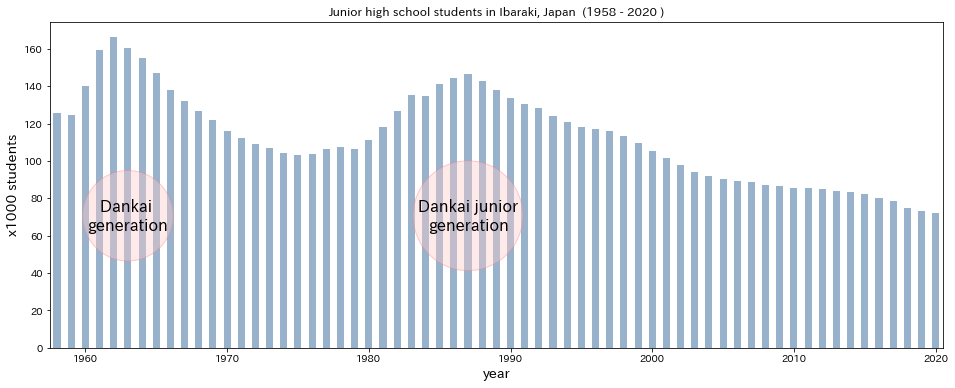

In [72]:
import matplotlib.patches as mpatches

students = tyuugaku[['year', '生徒数 [千人]']]

#plot
xlabels = np.arange(1960, 1958+63, 10)
students.plot(figsize=(16,6),  kind='bar', x = 'year', color=(0.2, 0.4, 0.6, 0.5),
              title="Junior high school students in Ibaraki, Japan  (1958 - 2020 )", legend=False)
plt.xlabel('year', fontsize=14)
plt.xticks([2,12,22,32,42,52,62], xlabels, rotation='0')
plt.ylabel('x1000 students', fontsize=14)

#text in circle
plt.text(5,80, "Dankai \ngeneration", size=16,ha="center", va="top",
         bbox=dict(boxstyle="circle",ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),alpha=0.4))
plt.text(29,80, "Dankai junior\ngeneration", size=16,ha="center", va="top",
             bbox=dict(boxstyle="circle",ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),alpha=0.4))
# Dankai generation means baby boomers in Japan soon after the World War II.
plt.savefig("graph/ibaraki_jhStudents.png")
plt.show()

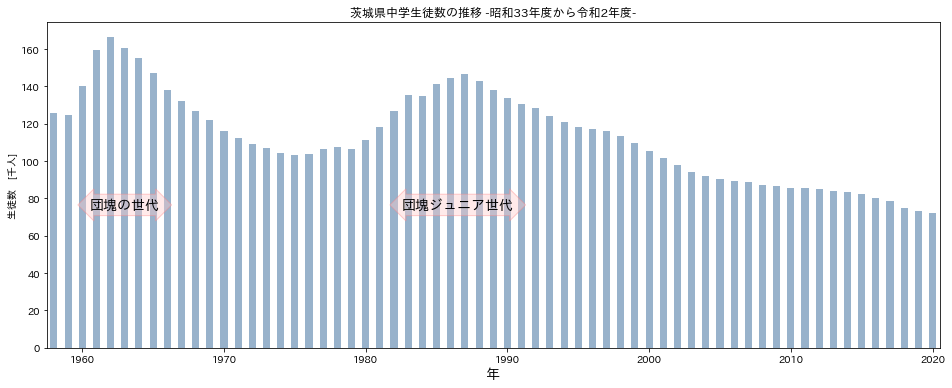

In [73]:
import matplotlib.patches as mpatches
students = tyuugaku[['year', '生徒数 [千人]']]

#plot 
xlabels = np.arange(1960, 1958+63, 10)
students.plot(figsize=(16,6),  kind='bar', x = 'year', color=(0.2, 0.4, 0.6, 0.5),
              title="茨城県中学生徒数の推移 -昭和33年度から令和2年度-", legend=False)
plt.xlabel('年', fontsize=14)
plt.xticks([2,12,22,32,42,52,62], xlabels, rotation='0')
plt.ylabel('生徒数　[千人]')
#text in darrow
plt.text(5,80, "団塊の世代", size=14,ha="center", va="top",
         bbox=dict(boxstyle="darrow",ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),alpha=0.4))
plt.text(28.5,80, "団塊ジュニア世代", size=14,ha="center", va="top",
             bbox=dict(boxstyle="darrow",ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),alpha=0.4))

plt.savefig("graph/茨城中学生徒数の推移darrow.png")
plt.show()